# Sentiment Analysis of IMDB reviews

## Importing the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('IMDB Dataset.csv')
df.head()
df.shape


(9999, 2)

In [ ]:
# Review Frquency Count
vc_df = pd.DataFrame(df['sentiment'].value_counts()).reset_index()
vc_df.columns = ['Sentiment', 'Count'] 
vc_df['Sentiment'] = vc_df['Sentiment'].map({1 : 'positive', 0: 'negative'}) 
vc_df

,Sentiment,Count
0,NaN,5027
1,NaN,4972


## Pre-processing the data

### Some common Problems:


1.   Remove Punctuation
2.   Replace short words
3.   Making text lower case
4.   Remove stopwords
5.   Lemmatization



#### Removing punctuation (.!<>{}’,”(/)-\)

In [ ]:
df['review']

0       One of the other reviewers has mentioned that ...
1       A wonderful little production. <br /><br />The...
2       I thought this was a wonderful way to spend ti...
3       Basically there's a family where a little boy ...
4       Petter Mattei's "Love in the Time of Money" is...
                              ...                        
9994    First off, this is the worst movie I've ever s...
9995    Fun, entertaining movie about WWII German spy ...
9996    Give me a break. How can anyone say that this ...
9997    This movie is a bad movie. But after watching ...
9998    This is a movie that was probably made to ente...
Name: review, Length: 9999, dtype: object

In [ ]:
# Replacing punctuations with space
df['review_processed'] = df['review'].str.replace("[^a-zA-Z0-9]", " ")

# Re ordering columns
df = df[['review','review_processed','sentiment']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
df['review_processed']

0       One of the other reviewers has mentioned that ...
1       A wonderful little production   br    br   The...
2       I thought this was a wonderful way to spend ti...
3       Basically there s a family where a little boy ...
4       Petter Mattei s  Love in the Time of Money  is...
                              ...                        
9994    First off  this is the worst movie I ve ever s...
9995    Fun  entertaining movie about WWII German spy ...
9996    Give me a break  How can anyone say that this ...
9997    This movie is a bad movie  But after watching ...
9998    This is a movie that was probably made to ente...
Name: review_processed, Length: 9999, dtype: object

#### Replacing short words

In [ ]:
'@'.join(["this", "batch" , "is", "awesome"])

'this@batch@is@awesome'

In [ ]:
df['review_processed'] = df['review_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [ ]:
df['review_processed']

0       One the other reviewers has mentioned that aft...
1       wonderful little production The filming techni...
2       thought this was wonderful way spend time too ...
3       Basically there family where little boy Jake t...
4       Petter Mattei Love the Time Money visually stu...
                              ...                        
9994    First off this the worst movie ever seen That ...
9995    Fun entertaining movie about WWII German spy J...
9996    Give break How can anyone say that this good h...
9997    This movie bad movie But after watching endles...
9998    This movie that was probably made entertain th...
Name: review_processed, Length: 9999, dtype: object

#### LowerCase character

In [ ]:
"kousik" == "Kousik"

False

In [ ]:
word = "Kousik"
word.lower()

'kousik'

In [ ]:
# make entire text lowercase
df['review_processed'] = [review.lower() for review in df['review_processed']]

In [ ]:
df['review_processed']

0       one the other reviewers has mentioned that aft...
1       wonderful little production the filming techni...
2       thought this was wonderful way spend time too ...
3       basically there family where little boy jake t...
4       petter mattei love the time money visually stu...
                              ...                        
9994    first off this the worst movie ever seen that ...
9995    fun entertaining movie about wwii german spy j...
9996    give break how can anyone say that this good h...
9997    this movie bad movie but after watching endles...
9998    this movie that was probably made entertain th...
Name: review_processed, Length: 9999, dtype: object

#### Remove stop words

In [ ]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['movie','film','one','make','even','like','see','movies','get','makes','making']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['review_processed']

0       reviewers mentioned watching episode hooked ri...
1       wonderful little production filming technique ...
2       thought wonderful way spend time hot summer we...
3       basically family little boy jake thinks zombie...
4       petter mattei love time money visually stunnin...
                              ...                        
9994    first worst ever seen may want bad good way bo...
9995    fun entertaining wwii german spy julie andrews...
9996    give break anyone say good hockey know movies ...
9997    bad watching endless series bad horror movies ...
9998    probably made entertain middle school early hi...
Name: review_processed, Length: 9999, dtype: object

#### Lemmatization

In [ ]:
# Begin Lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


1) split sentence into words
2) get the detailed POS for each word
3) get shallow POS from detailed POS
4) do lemmatisation for each word
5) join all the words to form sentence 

In [ ]:
df['review_processed']

0       reviewer mention watch episode hook right exac...
1       wonderful little production film technique una...
2       think wonderful way spend time hot summer week...
3       basically family little boy jake think zombie ...
4       petter mattei love time money visually stunnin...
                              ...                        
9994    first bad ever see may want bad good way bore ...
9995    fun entertain wwii german spy julie andrews fa...
9996    give break anyone say good hockey know tend pr...
9997    bad watch endless series bad horror say little...
9998    probably make entertain middle school early hi...
Name: review_processed, Length: 9999, dtype: object

#### Plotting Freqent Words

In [ ]:
df

,review,review_processed,sentiment
0,One of the other reviewers has mentioned that ...,reviewer mention watch episode hook right exac...,positive
1,A wonderful little production. <br /><br />The...,wonderful little production film technique una...,positive
2,I thought this was a wonderful way to spend ti...,think wonderful way spend time hot summer week...,positive
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...,positive
...,...,...,...
9994,"First off, this is the worst movie I've ever s...",first bad ever see may want bad good way bore ...,negative
9995,"Fun, entertaining movie about WWII German spy ...",fun entertain wwii german spy julie andrews fa...,positive
9996,Give me a break. How can anyone say that this ...,give break anyone say good hockey know tend pr...,negative
9997,This movie is a bad movie. But after watching ...,bad watch endless series bad horror say little...,negative


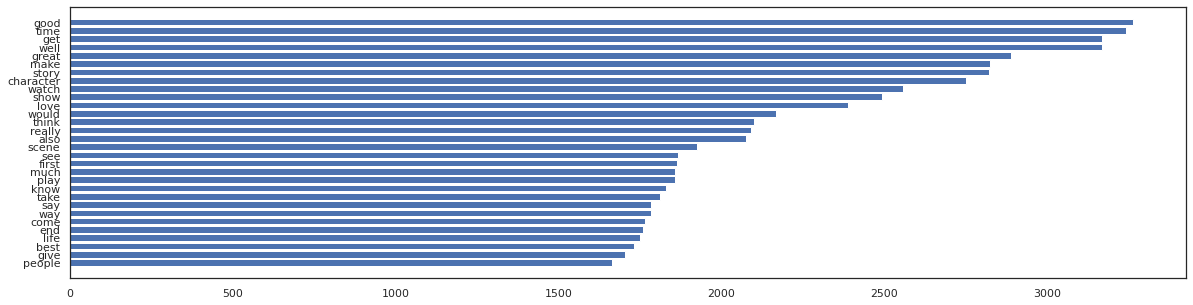

In [ ]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['sentiment'] == 'positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

#### WordCloud

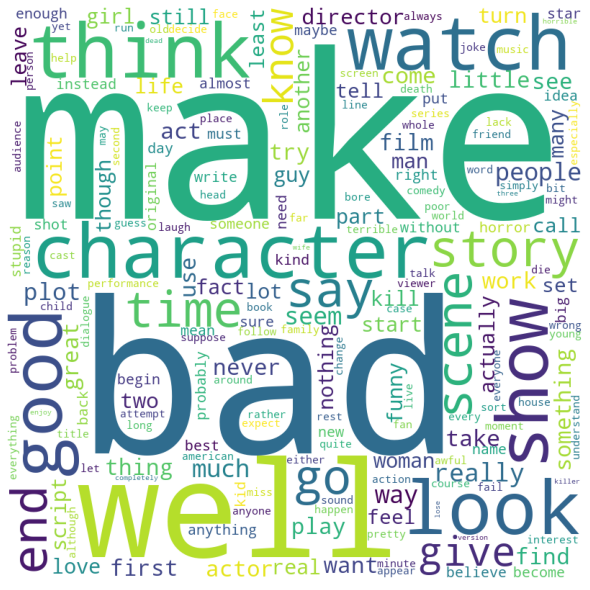

In [ ]:
##
## Bilding a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = df.loc[df['sentiment'] == 'negative',:]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Bag of Words Model

In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(df.review_processed).toarray()
y = df.sentiment.map({'positive' : 1, 'negative' : 0}).values
featureNames = tfidf.get_feature_names()

X, y


#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.shape, X_test.shape

((7999, 2500), (2000, 2500))

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Building the ML model

## Feature Importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

#featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)},columns = ['Word','Importance'])



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[723 276]
 [294 707]]
The model accuracy is 0.715


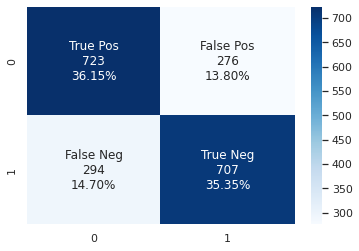

In [ ]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

0.715008715008715

In [ ]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
36,0.128376,bad
485,0.044835,waste
207,0.034393,great
33,0.023608,awful
280,0.016407,love
...,...,...
8,0.000375,wrong
66,0.000333,tire
468,0.000267,truly
418,0.000250,status
